In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
sms=pd.read_csv('spam.csv')
sms.head()

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  
0  content - length : 3386 apple-iss research cen...      0  
1  lang classification grimes , joseph e . and ba...      0  
2  i am posting this inquiry for sergei atamas ( ...      0  
3  a colleague and i are researching the differin...      0  
4  earlier this morning i was on the phone with a...      0

In [3]:
print('Shape is ',sms.shape)

Shape is  (2893, 3)


In [4]:
sms.dtypes

subject    object
message    object
label       int64
dtype: object

In [5]:
sms.columns

Index(['subject', 'message', 'label'], dtype='object')

In [6]:
sms.nunique()

subject    2613
message    2859
label         2
dtype: int64

In [7]:
count=sms.isnull().sum()
count

subject    62
message     0
label       0
dtype: int64

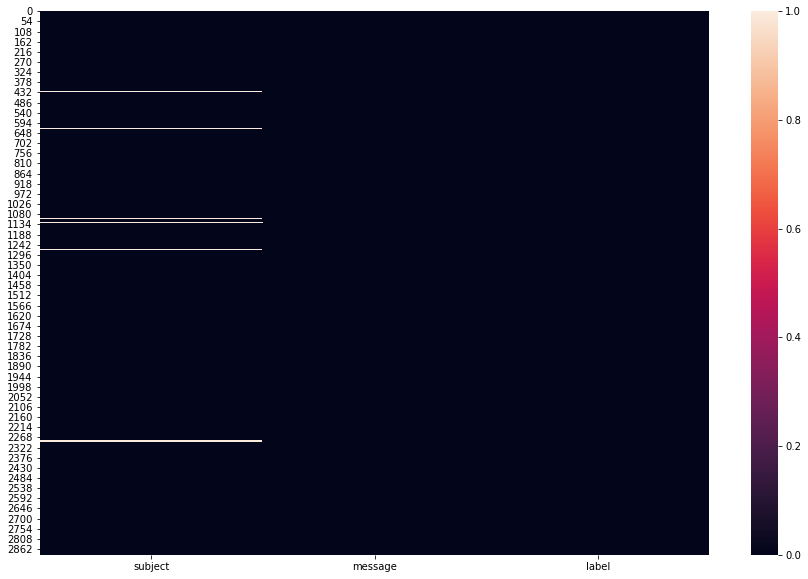

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(sms.isnull(), ax=ax)
plt.show()

In [9]:
sms = sms[sms.subject.notnull()]

In [10]:
count=sms.isnull().sum()
count

subject    0
message    0
label      0
dtype: int64

In [11]:
sms.shape

(2831, 3)

In [12]:
print("Non spam and spam are :\n",sms.label.value_counts())

Non spam and spam are :
 0    2363
1     468
Name: label, dtype: int64


In [13]:
print("ham ratio = ", round(len(sms[sms['label']==0])/len(sms.label),2)*100,'%')
print("spam ratio = ", round(len(sms[sms['label']==1])/len(sms.label),2)*100,'%')

ham ratio =  83.0 %
spam ratio =  17.0 %


In [14]:
sms['length']=sms.message.str.len()
sms.head()

subject  \
0            job posting - apple-iss research center   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   
5  call for abstracts : optimality in syntactic t...   

                                             message  label  length  
0  content - length : 3386 apple-iss research cen...      0    2856  
2  i am posting this inquiry for sergei atamas ( ...      0    1435  
3  a colleague and i are researching the differin...      0     324  
4  earlier this morning i was on the phone with a...      0    1046  
5  content - length : 4437 call for papers is the...      0    4492

In [15]:
sms['message']=sms['message'].str.lower()

In [16]:
sms.head()

subject  \
0            job posting - apple-iss research center   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   
5  call for abstracts : optimality in syntactic t...   

                                             message  label  length  
0  content - length : 3386 apple-iss research cen...      0    2856  
2  i am posting this inquiry for sergei atamas ( ...      0    1435  
3  a colleague and i are researching the differin...      0     324  
4  earlier this morning i was on the phone with a...      0    1046  
5  content - length : 4437 call for papers is the...      0    4492

In [17]:
sms['message']=sms['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','email')
sms['message']=sms['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
sms['message']=sms['message'].str.replace(r'£|\$','money')
sms['message']=sms['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phone')
sms['message']=sms['message'].str.replace(r'\d+(\.\d+)?','number')

In [18]:
sms.head()

subject  \
0            job posting - apple-iss research center   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   
5  call for abstracts : optimality in syntactic t...   

                                             message  label  length  
0  content - length : number apple-iss research c...      0    2856  
2  i am posting this inquiry for sergei atamas ( ...      0    1435  
3  a colleague and i are researching the differin...      0     324  
4  earlier this morning i was on the phone with a...      0    1046  
5  content - length : number call for papers is t...      0    4492

In [19]:
sms['message']=sms['message'].str.replace(r'[^\w\d\s]', ' ')
sms['message']=sms['message'].str.replace(r'\s+', ' ')
sms['message']=sms['message'].str.replace(r'^\s+|\s+?$', '')

In [20]:
sms.head()

subject  \
0            job posting - apple-iss research center   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   
5  call for abstracts : optimality in syntactic t...   

                                             message  label  length  
0  content length number apple iss research cente...      0    2856  
2  i am posting this inquiry for sergei atamas sa...      0    1435  
3  a colleague and i are researching the differin...      0     324  
4  earlier this morning i was on the phone with a...      0    1046  
5  content length number call for papers is the b...      0    4492

In [21]:
import string
import nltk
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
sms['message']=sms['message'].apply(lambda x: ' '.join(term for term in x.split()if term not in stop_words))

In [22]:
sms['clean']=sms.message.str.len()
sms.head()

subject  \
0            job posting - apple-iss research center   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   
5  call for abstracts : optimality in syntactic t...   

                                             message  label  length  clean  
0  content length number apple iss research cente...      0    2856   2190  
2  posting inquiry sergei atamas satamas umabnet ...      0    1435   1084  
3  colleague researching differing degrees risk p...      0     324    210  
4  earlier morning phone friend mine living south...      0    1046    629  
5  content length number call papers best good en...      0    4492   3409

In [23]:
print('original length', sms.length.sum())
print('clean length', sms.clean.sum())

original length 9186422
clean length 6716677


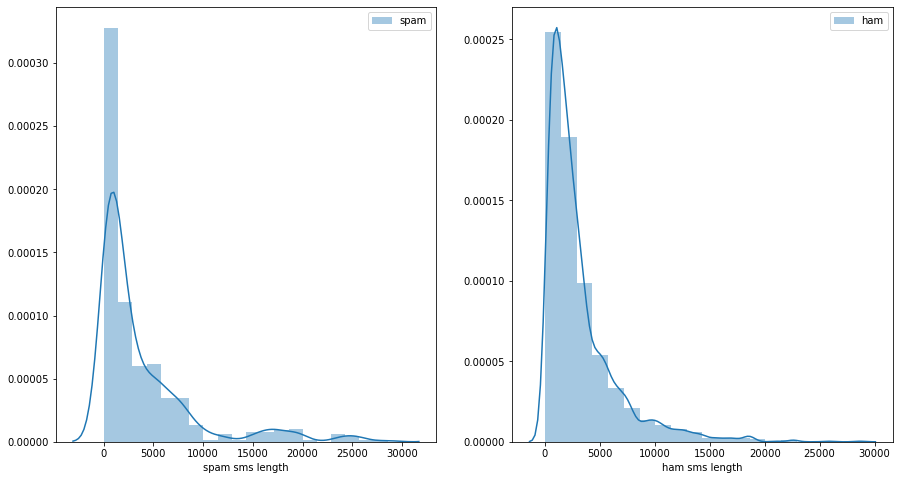

In [24]:
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(sms[sms['label']==1]['length'],bins=20,ax=ax[0],label='spam')
ax[0].set_xlabel('spam sms length')
ax[0].legend()

sns.distplot(sms[sms['label']==0]['length'],bins=20,ax=ax[1],label='ham')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

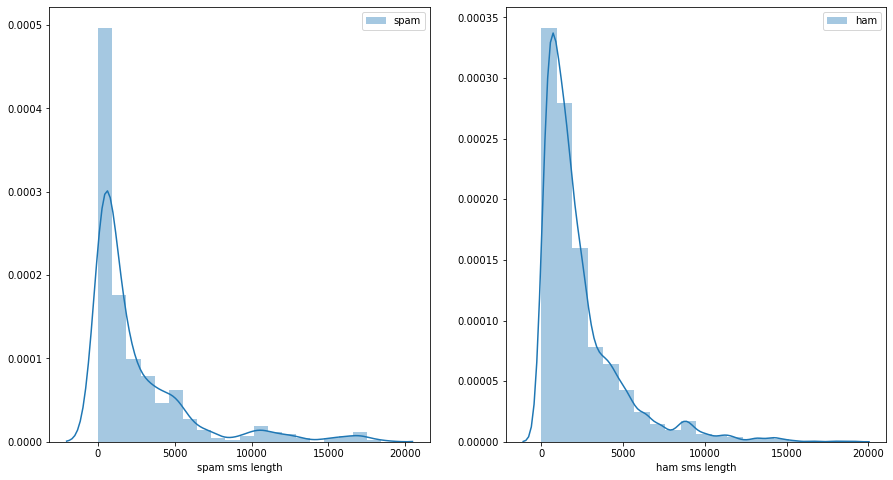

In [25]:
#After cleaning
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(sms[sms['label']==1]['clean'],bins=20,ax=ax[0],label='spam')
ax[0].set_xlabel('spam sms length')
ax[0].legend()

sns.distplot(sms[sms['label']==0]['clean'],bins=20,ax=ax[1],label='ham')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

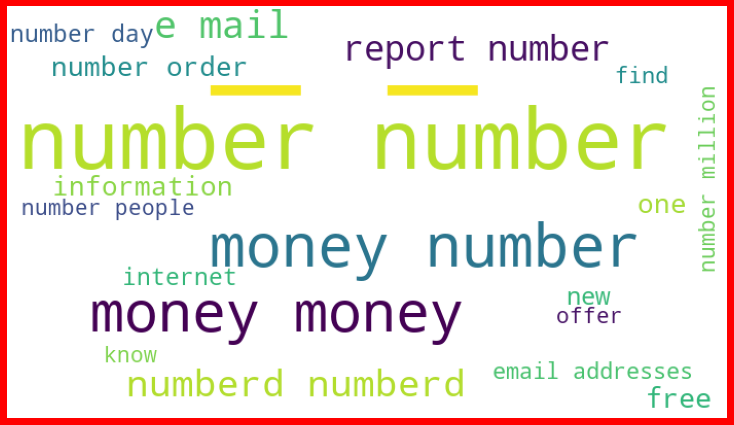

In [26]:
from wordcloud import WordCloud
spams=sms['message'][sms['label']==1]

spam_cloud=WordCloud(width=700,height=400,background_color='white',max_words=20).generate(' '.join(spams))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

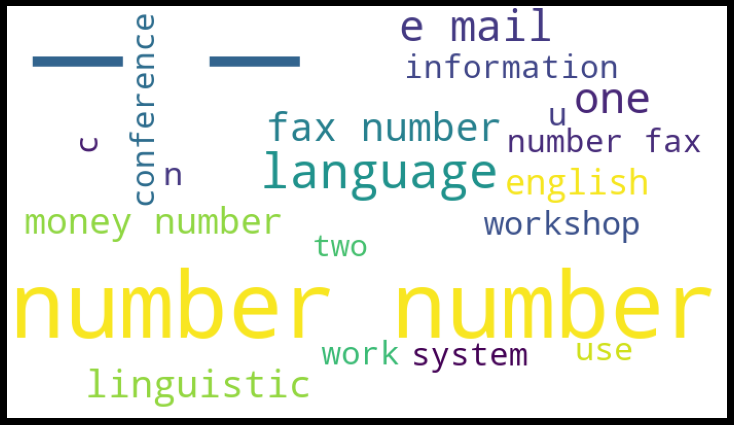

In [27]:
from wordcloud import WordCloud
hams=sms['message'][sms['label']==0]

spam_cloud=WordCloud(width=700,height=400,background_color='white',max_words=20).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [29]:
tf_vec=TfidfVectorizer()
features=tf_vec.fit_transform(sms['message'])
X=features
y=sms['label']

In [30]:
mn=MultinomialNB()
gn=GaussianNB()
svc=SVC()
lr = LogisticRegression()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
ada1=AdaBoostClassifier(base_estimator=dtc)
ada2=AdaBoostClassifier(base_estimator=lr)

In [31]:
X_train,x_text,Y_train,y_test=train_test_split(X.todense(),y,random_state=42)

In [32]:
models=[]
models.append(('GNB',gn))
models.append(('MNB',mn))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DTC',dtc))
models.append(('kNeighborsClassifier',knc))
models.append(('RFC',rfc))
models.append(('GBC',gbc))
models.append(('ADACLASS1',ada1))
models.append(('ADACLASS2',ada2))

In [33]:
Model=[]
score=[]
for name,model in models:
    print('****,name,****')
    print('\n')
    Model.append(name)
    model.fit(X_train,Y_train)
    print(model)
    y_pred=model.predict(x_text)
    print('\n')
    AS=accuracy_score(y_test,y_pred)
    print('accuracy score',AS)
    score.append(AS*100)
    print('\n')

****,name,****


GaussianNB()


accuracy score 0.96045197740113


****,name,****


MultinomialNB()


accuracy score 0.847457627118644


****,name,****


SVC()


accuracy score 0.9731638418079096


****,name,****


LogisticRegression()


accuracy score 0.9548022598870056


****,name,****


DecisionTreeClassifier()


accuracy score 0.9562146892655368


****,name,****


KNeighborsClassifier()


accuracy score 0.9717514124293786


****,name,****


RandomForestClassifier()


accuracy score 0.9703389830508474


****,name,****


GradientBoostingClassifier()


accuracy score 0.9731638418079096


****,name,****


AdaBoostClassifier(base_estimator=DecisionTreeClassifier())


accuracy score 0.9590395480225988


****,name,****


AdaBoostClassifier(base_estimator=LogisticRegression())


accuracy score 0.8248587570621468




In [34]:
result=pd.DataFrame({'Model':Model,'Accuracy_score': score})
result

Model  Accuracy_score
0                   GNB       96.045198
1                   MNB       84.745763
2                   SVC       97.316384
3    LogisticRegression       95.480226
4                   DTC       95.621469
5  kNeighborsClassifier       97.175141
6                   RFC       97.033898
7                   GBC       97.316384
8             ADACLASS1       95.903955
9             ADACLASS2       82.485876

In [35]:
X_train,x_text,Y_train,y_test=train_test_split(X,y,random_state=42)
svc.fit(X_train,Y_train)
y_pred=svc.predict(x_text)
print('accuracy score is',accuracy_score(y_test,y_pred))

accuracy score is 0.9731638418079096


In [36]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       584
           1       1.00      0.85      0.92       124

    accuracy                           0.97       708
   macro avg       0.98      0.92      0.95       708
weighted avg       0.97      0.97      0.97       708



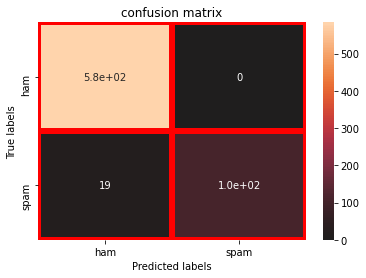

In [38]:
conf_mat=confusion_matrix(y_test,y_pred)
ax=plt.subplot()
sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('confusion matrix')
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()

In [39]:
conf_mat

array([[584,   0],
       [ 19, 105]], dtype=int64)